In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [85]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [86]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [88]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [89]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [90]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No missing or null vlaues

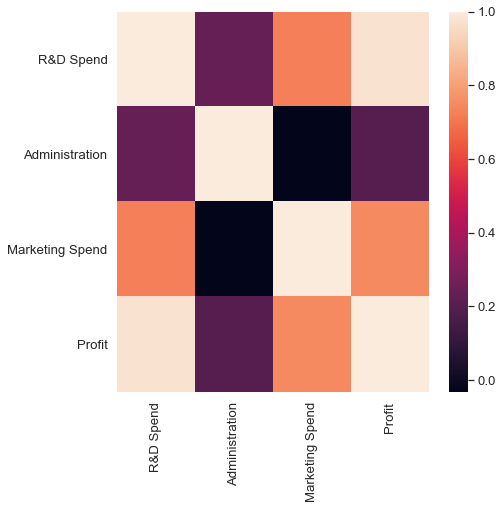

In [91]:
#Admistration and Marketing Spend has a strong corr
sns.heatmap(df.corr())

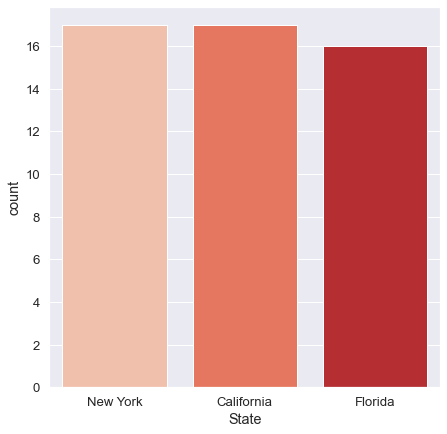

In [92]:
#The profit of all state are smilier , nothing important
sns.countplot(x="State", data=df,palette='Reds')

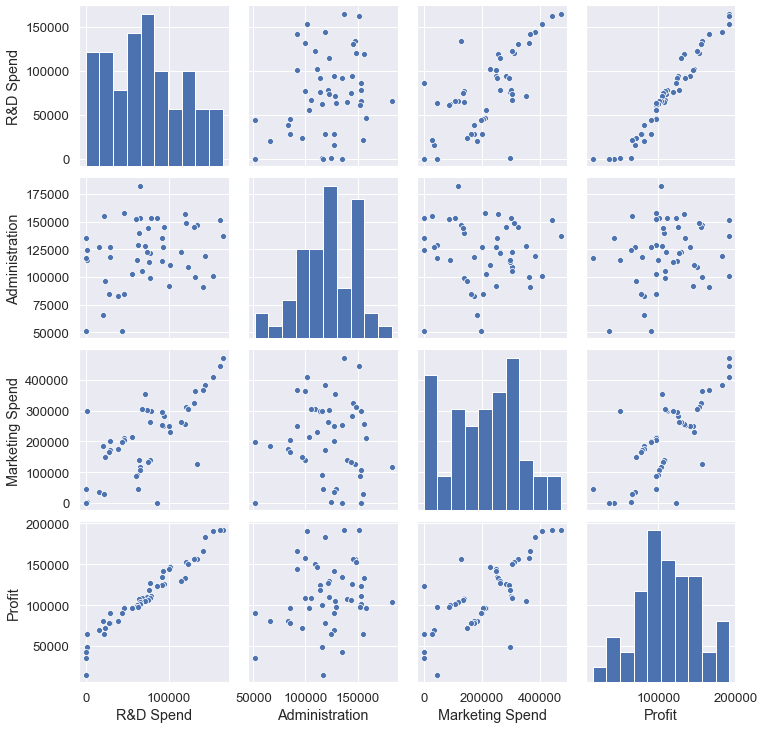

In [93]:
#Profit and R&D Spend has linear relation
sns.pairplot(df);

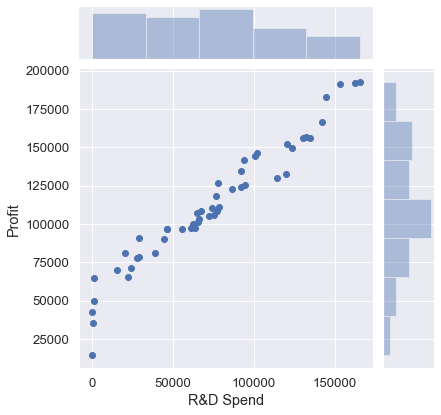

In [94]:
sns.jointplot(x='R&D Spend',y='Profit',data=df)

There is linear relation between the profit and R&D spend

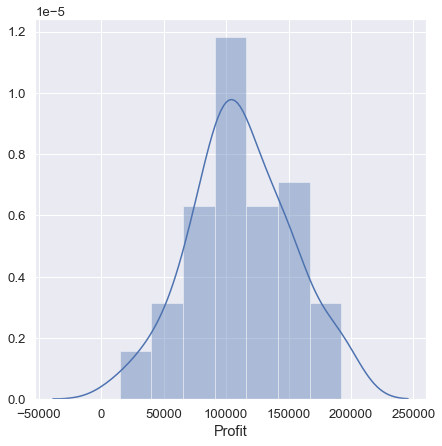

In [95]:
#profit distribution is normly
sns.distplot(df["Profit"])

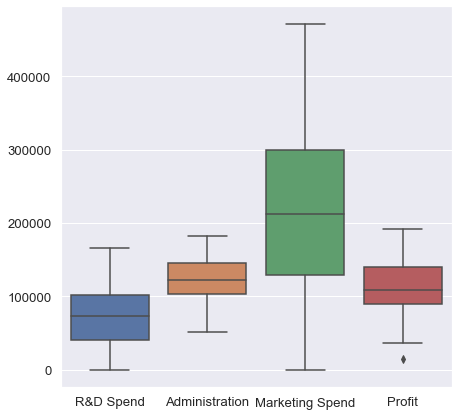

In [96]:
sns.boxplot(data=df)

In [98]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

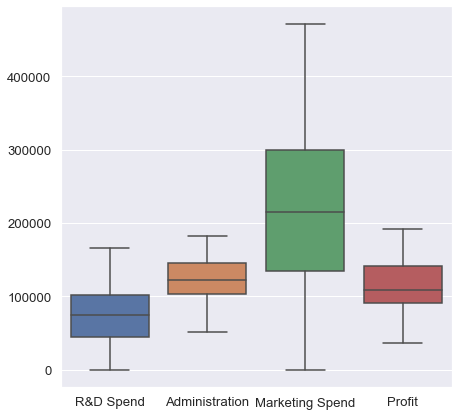

In [99]:
sns.boxplot(data=df)

In [100]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [101]:
#Scale data
from sklearn.preprocessing import StandardScaler,Normalizer
sc_RD=StandardScaler()
df["R&D Spend"]=sc_RD.fit_transform(df["R&D Spend"].values.reshape(-1, 1))
df["R&D Spend"].values.reshape(-1, 1)

array([[ 2.01832469],
       [ 1.95670428],
       [ 1.7516495 ],
       [ 1.54854512],
       [ 1.49781841],
       [ 1.26870558],
       [ 1.3300362 ],
       [ 1.2333487 ],
       [ 1.01486978],
       [ 1.07740527],
       [ 0.5976596 ],
       [ 0.56986446],
       [ 0.41739319],
       [ 0.37548369],
       [ 1.00144878],
       [ 0.88007504],
       [ 0.06241481],
       [ 0.43516177],
       [ 0.3700365 ],
       [ 0.25068214],
       [ 0.02301604],
       [ 0.07084347],
       [-0.02758145],
       [-0.17229996],
       [ 0.04071161],
       [-0.23652538],
       [ 0.0023007 ],
       [-0.06984031],
       [-0.20546749],
       [-0.21545664],
       [-0.29632574],
       [-0.31554307],
       [-0.2646504 ],
       [-0.44190646],
       [-0.64498352],
       [-0.65421146],
       [-1.04277414],
       [-0.69774931],
       [-1.23165913],
       [-0.82117916],
       [-1.04074581],
       [-1.06003726],
       [-1.15526146],
       [-1.33745096],
       [-1.18802991],
       [-1

In [102]:
sc_Marketing_Spend=StandardScaler()
df["Marketing Spend"]=sc_Marketing_Spend.fit_transform(df["Marketing Spend"].values.reshape(-1,1))
df["Marketing Spend"].values.reshape(-1, 1)

array([[ 2.14611996e+00],
       [ 1.91359564e+00],
       [ 1.61370926e+00],
       [ 1.40745668e+00],
       [ 1.26544171e+00],
       [ 1.23786573e+00],
       [-7.22891254e-01],
       [ 9.12791275e-01],
       [ 8.10532777e-01],
       [ 7.55234477e-01],
       [ 1.23002453e-01],
       [ 2.94639173e-01],
       [ 2.95430415e-01],
       [ 3.18990814e-01],
       [ 3.51077348e-01],
       [ 3.94965553e-01],
       [ 4.16394127e-01],
       [ 5.68390718e-01],
       [ 6.71331892e-01],
       [-1.78786026e+00],
       [ 7.02558808e-01],
       [ 7.11504537e-01],
       [ 7.41372858e-01],
       [ 7.53459290e-01],
       [-6.15674673e-01],
       [-6.37456466e-01],
       [-6.70081335e-01],
       [ 1.15716931e+00],
       [-8.02679365e-01],
       [-8.94484947e-01],
       [-1.02796077e+00],
       [-1.05225096e+00],
       [-1.40357757e+00],
       [ 1.87597256e-03],
       [-3.01200885e-02],
       [-7.41477139e-02],
       [-1.10760646e-01],
       [-1.44926889e-01],
       [-2.4

In [103]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.018325,136897.80,2.146120,New York,192261.83
1,1.956704,151377.59,1.913596,California,191792.06
2,1.751650,101145.55,1.613709,Florida,191050.39
3,1.548545,118671.85,1.407457,New York,182901.99
4,1.497818,91391.77,1.265442,Florida,166187.94


In [104]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,4.900000e+01,49.000000,4.900000e+01,49.000000
mean,5.437827e-17,121433.636327,-1.178196e-16,113998.991020
std,1.010363e+00,28301.008988,1.010363e+00,38171.246893
min,-1.684705e+00,51283.140000,-1.787860e+00,35673.410000
25%,-6.977493e-01,103057.490000,-6.700813e-01,90708.190000
50%,-2.758145e-02,122782.750000,1.875973e-03,108552.040000
75%,5.976596e-01,145077.580000,7.115045e-01,141585.520000
max,2.018325e+00,182645.560000,2.146120e+00,192261.830000


In [114]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [121]:
df.drop('State', axis=1, inplace=True)

In [122]:
x =df.drop('Profit',axis=1).values
y =df['Profit'].values

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [124]:
lm = LinearRegression()

In [125]:
lm.fit(x_train,y_train)

LinearRegression()

In [126]:
lm.coef_

array([ 3.49908550e+04, -1.70795676e-03,  3.54854664e+03])

In [127]:
lm.intercept_

113362.36091809654

In [128]:
y_hat = lm.predict(x_test)
y_hat

array([ 76264.75634567, 114818.3508182 , 116466.29409541,  69290.53707943,
       128497.49977012, 188361.05367652,  48696.88317143, 118103.40314774,
       116816.21907152,  57693.31246048,  66021.88461467, 159508.809739  ,
        74648.38875518, 172339.018087  ,  83320.72754936])

In [129]:
y_test

array([ 90708.19, 110352.25, 118474.03,  81229.06, 124266.9 , 191792.06,
        64926.08, 111313.02, 126992.93,  49490.75,  65200.33, 155752.6 ,
        77798.83, 182901.99,  81005.76])

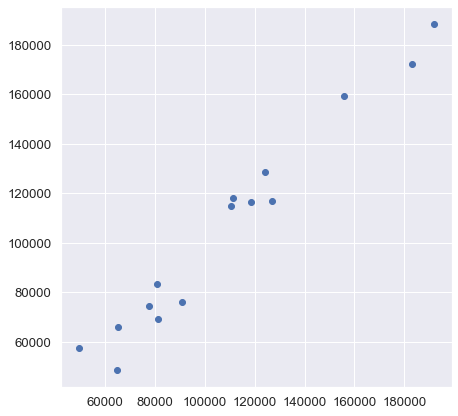

In [130]:
#Acutal and predicted values are near to each other
plt.scatter(y_test,y_hat)

In [131]:
lm.score(x_test, y_hat)

1.0

In [132]:
lm.score(x_test, y_hat)

1.0

In [133]:
np.sqrt(mean_squared_error(y_test, y_hat))

8273.557668008145